# **Tennis Matches Data Analysis Project**

# Import Dependencies

In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# EDA

The data set has fifteen data frames, including: 
* Dataset Tables:
    * event_df
        * shape : 764 rows, 10 columns
    * vote_df
        * shape : 764 rows, 3 columns
    * tournament_df
        * shape : 764 rows, 16 columns
    * season_df
        * shape : 764 rows, 4 columns
    * round_df
        * shape : 177 rows, 5 columns
    * venue_df
        * shape : 763 rows, 5 columns
    * home_team_df
        * shape : 436 rows, 18 columns
    * home_score_df
        * shape : 764 rows, 14 columns
    * away_team_df
        * shape : 385 rows, 18 columns
    * away_score_df
        * shape : 764 rows, 14 columns
    * time_df
        * shape : 764 rows, 6 columns
    * odds_df
        * shape : 847 rows, 11 columns
    * power_df
        * shape : 3475 rows, 5 columns
    * point_by_point_df
        * shape : 22879 rows, 13 columns
   * point_by_point_df
        * shape : 12262 rows, 13 columns
* Other EDAs comes after importing each tables.
* Data cleaning comes where ever needed, based on analysis.

# Dataset Loading

### Event Data Frame

In [4]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/event")
event_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
    )
event_df.head(3)

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only
0,11673958,None,1,4,JgdbspFNb,2,3,1696094700,tirante-barrios-vera,False
1,11673962,None,4,None,pFNbsHbwc,1,3,1696176000,heide-tirante,False
2,11673963,None,None,None,fTxsHbwc,1,3,1696087800,heide-jorda-sanchis,False


In [5]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   match_id              764 non-null    int64 
 1   first_to_serve        209 non-null    object
 2   home_team_seed        393 non-null    object
 3   away_team_seed        392 non-null    object
 4   custom_id             764 non-null    object
 5   winner_code           757 non-null    object
 6   default_period_count  764 non-null    int64 
 7   start_datetime        764 non-null    int64 
 8   match_slug            764 non-null    object
 9   final_result_only     764 non-null    bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 54.6+ KB


### Vote Data Frame

In [6]:
data_dir = Path("tennis_data_20231212/raw_votes_parquet")
vote_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
vote_df.head(3)

,match_id,home_vote,away_vote
0,11673958,554,233
1,11673962,909,213
2,11673963,399,213


In [7]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   match_id   764 non-null    int64
 1   home_vote  764 non-null    int64
 2   away_vote  764 non-null    int64
dtypes: int64(3)
memory usage: 18.0 KB


### Tournament Data Frame

In [8]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/tournament")
tournament_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
tournament_df.head(3)

,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
0,11673958,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
1,11673962,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
2,11673963,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2


In [29]:
tournament_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   match_id                         764 non-null    int64 
 1   tournament_id                    764 non-null    int64 
 2   tournament_name                  764 non-null    object
 3   tournament_slug                  764 non-null    object
 4   tournament_unique_id             0 non-null      object
 5   tournament_category_name         764 non-null    object
 6   tournament_category_slug         764 non-null    object
 7   user_count                       764 non-null    int64 
 8   ground_type                      747 non-null    object
 9   tennis_points                    164 non-null    object
 10  has_event_player_statistics      764 non-null    bool  
 11  crowd_sourcing_enabled           764 non-null    bool  
 12  has_performance_graph_feature    764

### Season Data Frame

In [9]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/season")
season_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
season_df.head(3)

,match_id,season_id,name,year
0,11673958,52736,"ATP Challenger Bogota, Colombia Men Singles 2023",2023
1,11673962,52736,"ATP Challenger Bogota, Colombia Men Singles 2023",2023
2,11673963,52736,"ATP Challenger Bogota, Colombia Men Singles 2023",2023


In [31]:
season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   match_id   764 non-null    int64 
 1   season_id  764 non-null    int64 
 2   name       764 non-null    object
 3   year       764 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 24.0+ KB


### Round Data Frame

In [10]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/round")
round_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
round_df.head(3)

,match_id,round_id,name,slug,cup_round_type
0,11673958,28,Semifinal,semifinal,2
1,11673962,29,Final,final,1
2,11673963,28,Semifinal,semifinal,2


In [33]:
round_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   match_id        177 non-null    int64 
 1   round_id        177 non-null    int64 
 2   name            177 non-null    object
 3   slug            177 non-null    object
 4   cup_round_type  69 non-null     object
dtypes: int64(2), object(3)
memory usage: 7.0+ KB


### Venue Data Frame

In [11]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/venue")
venue_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
venue_df.head(3)

,match_id,city,stadium,venue_id,country
0,11673958,Bogota,Cancha Central,18338,Colombia
1,11673962,Bogota,Cancha Central,18338,Colombia
2,11673963,Bogota,Cancha Central,18338,Colombia


In [35]:
venue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   match_id  763 non-null    int64 
 1   city      763 non-null    object
 2   stadium   763 non-null    object
 3   venue_id  763 non-null    int64 
 4   country   762 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.9+ KB


### Home Team Data Frame

In [12]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/home")
home_team_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
home_team_df.head(3)

C:\Users\amine\AppData\Local\Temp\ipykernel_3180\2939222363.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  home_team_df = pd.concat(


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11673958,Barrios Vera T.,barrios-vera-tomas,M,2915,Santiago,"Chillan, Chile",1.91,83,right-handed,2014,265608,646273,132834,103,BAR,Chile,"Barrios Vera, Tomás"
1,11673962,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78,right-handed,None,249335,430793,221515,123,TIR,Argentina,"Tirante, Thiago Agustin"
2,11673963,Heide G.,heide-gustavo,M,1177,None,Sao Paulo,1.88,None,right-handed,None,36929,87230,302582,247,HEI,Brazil,"Heide, Gustavo"


In [37]:
home_team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       436 non-null    int64  
 1   name           436 non-null    object 
 2   slug           436 non-null    object 
 3   gender         436 non-null    object 
 4   user_count     436 non-null    int64  
 5   residence      112 non-null    object 
 6   birthplace     245 non-null    object 
 7   height         237 non-null    float64
 8   weight         112 non-null    object 
 9   plays          181 non-null    object 
 10  turned_pro     65 non-null     object 
 11  current_prize  427 non-null    object 
 12  total_prize    432 non-null    object 
 13  player_id      436 non-null    int64  
 14  current_rank   430 non-null    object 
 15  name_code      436 non-null    object 
 16  country        435 non-null    object 
 17  full_name      436 non-null    object 
dtypes: float64

### Away Team Data Frame

In [13]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/away")
away_team_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
away_team_df.head(3)

C:\Users\amine\AppData\Local\Temp\ipykernel_3180\2063714720.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  away_team_df = pd.concat(


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11673958,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78,right-handed,None,249335,430793,221515,123,TIR,Argentina,"Tirante, Thiago Agustin"
1,11673962,Heide G.,heide-gustavo,M,1177,None,Sao Paulo,1.88,None,right-handed,None,36929,87230,302582,247,HEI,Brazil,"Heide, Gustavo"
2,11673963,Jorda Sanchis D.,jorda-sanchis-david,M,344,Spain,"Barcelona, Spain",1.98,83,right-handed,None,27028,72338,57155,331,JOR,Spain,"Jorda Sanchis, David"


In [39]:
away_team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       386 non-null    int64  
 1   name           386 non-null    object 
 2   slug           386 non-null    object 
 3   gender         386 non-null    object 
 4   user_count     386 non-null    int64  
 5   residence      116 non-null    object 
 6   birthplace     219 non-null    object 
 7   height         215 non-null    float64
 8   weight         113 non-null    object 
 9   plays          177 non-null    object 
 10  turned_pro     71 non-null     object 
 11  current_prize  374 non-null    object 
 12  total_prize    383 non-null    object 
 13  player_id      386 non-null    int64  
 14  current_rank   368 non-null    object 
 15  name_code      386 non-null    object 
 16  country        385 non-null    object 
 17  full_name      386 non-null    object 
dtypes: float64

### Home Team Score Data Frame

In [14]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/home_score")
home_score_df = pd.concat(
   (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
home_score_df.head(3)

,match_id,current_score,display_score,period_1,period_2,period_3,period_4,period_5,period_1_tie_break,period_2_tie_break,period_3_tie_break,period_4_tie_break,period_5_tie_break,normal_time
0,11673958,0,0,2,4,None,None,None,None,None,None,None,None,None
1,11673962,None,None,None,None,None,None,None,None,None,None,None,None,None
2,11673963,2,2,7,6,None,None,None,None,None,None,None,None,None


In [41]:
home_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            764 non-null    int64 
 1   current_score       739 non-null    object
 2   display_score       739 non-null    object
 3   period_1            746 non-null    object
 4   period_2            740 non-null    object
 5   period_3            181 non-null    object
 6   period_4            0 non-null      object
 7   period_5            0 non-null      object
 8   period_1_tie_break  17 non-null     object
 9   period_2_tie_break  20 non-null     object
 10  period_3_tie_break  4 non-null      object
 11  period_4_tie_break  0 non-null      object
 12  period_5_tie_break  0 non-null      object
 13  normal_time         0 non-null      object
dtypes: int64(1), object(13)
memory usage: 83.7+ KB


### Away Team Score Data Frame

In [15]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/away_score")
away_score_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
away_score_df.head(3)

,match_id,current_score,display_score,period_1,period_2,period_3,period_4,period_5,period_1_tie_break,period_2_tie_break,period_3_tie_break,period_4_tie_break,period_5_tie_break,normal_time
0,11673958,2,2,6,6,None,None,None,None,None,None,None,None,None
1,11673962,None,None,None,None,None,None,None,None,None,None,None,None,None
2,11673963,0,0,6,4,None,None,None,None,None,None,None,None,None


In [44]:
away_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            764 non-null    int64 
 1   current_score       739 non-null    object
 2   display_score       739 non-null    object
 3   period_1            746 non-null    object
 4   period_2            740 non-null    object
 5   period_3            181 non-null    object
 6   period_4            0 non-null      object
 7   period_5            0 non-null      object
 8   period_1_tie_break  17 non-null     object
 9   period_2_tie_break  20 non-null     object
 10  period_3_tie_break  4 non-null      object
 11  period_4_tie_break  0 non-null      object
 12  period_5_tie_break  0 non-null      object
 13  normal_time         0 non-null      object
dtypes: int64(1), object(13)
memory usage: 83.7+ KB


### Time Data Frame

In [16]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/time")
time_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
time_df.head(3)

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,11673958,1960,2457,None,None,None,1696097817
1,11673962,None,None,None,None,None,1696176527
2,11673963,3403,2431,None,None,None,1696091852


In [46]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   match_id                        764 non-null    int64 
 1   period_1                        320 non-null    object
 2   period_2                        319 non-null    object
 3   period_3                        107 non-null    object
 4   period_4                        0 non-null      object
 5   period_5                        0 non-null      object
 6   current_period_start_timestamp  329 non-null    object
dtypes: int64(1), object(6)
memory usage: 41.9+ KB


### Odds Data Frame

In [18]:
data_dir = Path("tennis_data_20231212/raw_odds_parquet")
odds_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
odds_df.head(3)

,match_id,market_id,market_name,is_live,suspended,initial_fractional_value,fractional_value,choice_name,choice_source_id,winnig,change
0,11673958,1,full_time,False,False,73/100,83/100,1,1349454568,False,1
1,11673958,1,full_time,False,False,1/1,83/100,2,1349454681,True,-1
2,11673958,11,first_set_winner,False,False,8/11,5/6,1,1349620691,False,1


In [48]:
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   match_id                  848 non-null    int64 
 1   market_id                 848 non-null    int64 
 2   market_name               848 non-null    object
 3   is_live                   848 non-null    bool  
 4   suspended                 848 non-null    bool  
 5   initial_fractional_value  848 non-null    object
 6   fractional_value          848 non-null    object
 7   choice_name               848 non-null    object
 8   choice_source_id          848 non-null    int64 
 9   winnig                    836 non-null    object
 10  change                    848 non-null    int64 
dtypes: bool(2), int64(4), object(5)
memory usage: 61.4+ KB


### Tennis Power Data Frame

In [19]:
data_dir = Path("tennis_data_20231212/raw_tennis_power_parquet")
tennis_power_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
tennis_power_df.head(3)

,match_id,set_num,game_num,value,break_occurred
0,11674074,1,1,30.5,False
1,11674074,1,2,81.1,True
2,11674074,1,3,51.6,False


In [50]:
tennis_power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   match_id        3476 non-null   int64  
 1   set_num         3476 non-null   int64  
 2   game_num        3476 non-null   int64  
 3   value           3476 non-null   float64
 4   break_occurred  3476 non-null   bool   
dtypes: bool(1), float64(1), int64(3)
memory usage: 112.1 KB


### Point by Point Data Frame

In [21]:
data_dir = Path("tennis_data_20231212/raw_point_by_point_parquet")
point_by_point_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
point_by_point_df.head(3)

,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring
0,11674074,2,7,0,0,15,2,5,1,6,1,1,1
1,11674074,2,7,1,0,30,0,5,1,6,1,1,1
2,11674074,2,7,2,15,30,1,1,5,6,1,1,1


In [52]:
point_by_point_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22880 entries, 0 to 22879
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           22880 non-null  int64 
 1   set_id             22880 non-null  int64 
 2   game_id            22880 non-null  int64 
 3   point_id           22880 non-null  int64 
 4   home_point         22880 non-null  object
 5   away_point         22880 non-null  object
 6   point_description  22880 non-null  int64 
 7   home_point_type    22880 non-null  int64 
 8   away_point_type    22880 non-null  int64 
 9   home_score         22880 non-null  int64 
 10  away_score         22880 non-null  int64 
 11  serving            22880 non-null  int64 
 12  scoring            22880 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 2.3+ MB


### Statistics Data Frame

In [22]:
data_dir = Path("tennis_data_20231212/raw_statistics_parquet")
statistics_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
statistics_df.head(3)

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11674074,ALL,service,aces,1,2,2,positive,event,1,2,NaN,NaN
1,11674074,ALL,service,double_faults,1,3,2,negative,event,1,3,NaN,NaN
2,11674074,ALL,service,first_serve,34/52 (65%),26/57 (46%),1,positive,team,34,26,52.0,57.0


In [54]:
statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12263 entries, 0 to 12262
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   match_id                 12263 non-null  int64  
 1   period                   12263 non-null  object 
 2   statistic_category_name  12263 non-null  object 
 3   statistic_name           12263 non-null  object 
 4   home_stat                12263 non-null  object 
 5   away_stat                12263 non-null  object 
 6   compare_code             12263 non-null  int64  
 7   statistic_type           12263 non-null  object 
 8   value_type               12263 non-null  object 
 9   home_value               12263 non-null  int64  
 10  away_value               12263 non-null  int64  
 11  home_total               4837 non-null   float64
 12  away_total               4837 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.2+ MB


## Main Analysis

#### Q1: How many tennis players are included in the dataset?

In [23]:
total_players = pd.concat([home_team_df["player_id"], away_team_df["player_id"]]).unique().shape[0]
print(f"There are {total_players} players in dataset.")

There are 596 players in dataset.


##### Q1 Analysis
By concatenation of home/away team plyer ids unitize them the number of plyers was calculated.


#### Q2: What is the average age of the players? 

In [24]:
away_team_int = away_team_df[~away_team_df["turned_pro"].isna()]["turned_pro"].astype(int)
home_team_int = home_team_df[~home_team_df["turned_pro"].isna()]["turned_pro"].astype(int)
become_professional_mean = int(pd.concat([home_team_int, away_team_int]).mean())
print(f"The average year of becoming professional is: {become_professional_mean}")

The average year of becoming professional is: 2012


##### Q2 Analysis
There is no way to find age of plyers with this information, so the question has been changed to average year of becoming pro. Again by turned_pro column of home/away team and casting type to int, it could be solved.  

#### Q3: Which player has the highest number of wins?

In [93]:
home_winner = event_df[event_df["winner_code"] == 1]["match_id"]
away_winner = event_df[event_df["winner_code"] == 2]["match_id"]

home_winner_names = pd.merge(home_team_df[["match_id", "full_name"]], home_winner)
away_winner_names = pd.merge(away_team_df[["match_id", "full_name"]], away_winner)

total_winners = pd.merge(home_winner_names, away_winner_names, how="outer")
total_winners.duplicated().sum()

total_winners = total_winners.groupby("full_name").agg(number_of_wins = 
                                       ("full_name","count")).sort_values("number_of_wins", ascending=False).reset_index().head()
total_winners

,full_name,number_of_wins
0,"Milushev, Plamen",3
1,"Panaras, Adam",3
2,"Kalina, Vit",3
3,"Mouilleron Salvo, Manuel",2
4,"Fery, Arthur",2


##### Q3 Analysis
At first find home and away winner codes from event df, then merge them to home_team_df and away_team_df to find their names. At the end group them by their names, count and sort them to find answer. **There are 3 players at the top of list, each of them has 3 wins.**

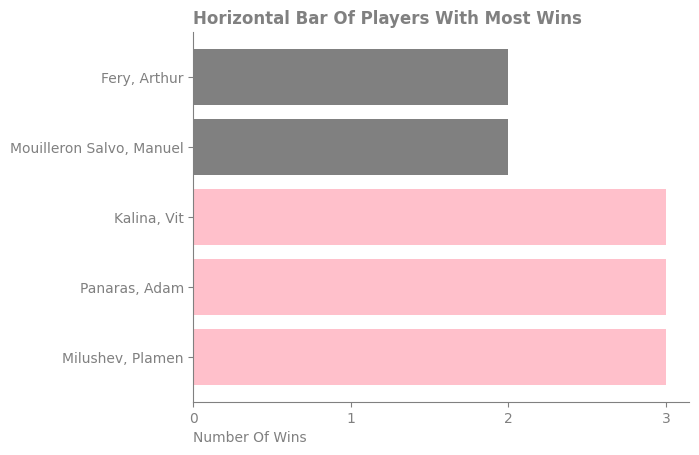

In [96]:
ax = plt.subplot()
clrs = ["gray" if (x < max(total_winners["number_of_wins"])) else "pink" for x in total_winners["number_of_wins"]]
ax.barh(total_winners["full_name"], total_winners["number_of_wins"], color=clrs)
ax.set_title("Horizontal Bar Of Players With Most Wins", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Number Of Wins", loc="left", color="gray")
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

#### Q4: What is the longest match recorded in terms of duration?

In [27]:
time_df["sum_of_durations"] = (time_df["period_1"].fillna(0) + time_df["period_2"].fillna(0) + time_df["period_3"].fillna(0) +
                            time_df["period_4"].fillna(0) + time_df["period_5"].fillna(0))
longest_matches = time_df[["match_id","sum_of_durations"]].sort_values("sum_of_durations", ascending=False).head(5)

longest_matches


,match_id,sum_of_durations
331,11699235,12835
39,11697113,11123
300,11699173,11060
36,11697108,10795
24,11675448,10650


##### Q4 Analysis
At first sum_of_durations column was added to time_df table that is sum of all match periods. Then it was sorted based on this new colum. **Five longest matches was shown in the horizontal bar plot, the longest matches the pink one.**

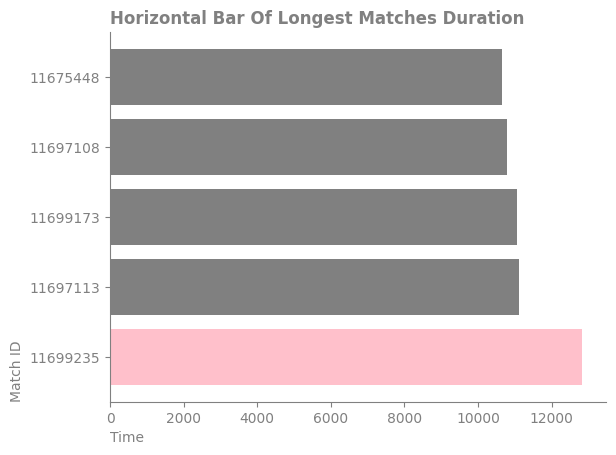

In [90]:
longest_matches_str = longest_matches
longest_matches_str["match_id"] = longest_matches_str["match_id"].astype(str)

ax = plt.subplot()
clrs = ["grey" if (x < max(longest_matches_str["sum_of_durations"])) 
        else "pink" for x in longest_matches_str["sum_of_durations"] ]
ax.barh(longest_matches_str["match_id"], longest_matches_str["sum_of_durations"] , color=clrs)
ax.set_title("Horizontal Bar Of Longest Matches Duration", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Time", loc="left", color="gray")
ax.set_ylabel("Match ID", loc="bottom", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.show()

#### Q5: How many sets are typically played in a tennis match?

In [29]:
mean_set_per_match = home_score_df[[
     "period_1", "period_2", "period_3", "period_4", "period_5"]].dropna(axis = 0, how = 'all').notnull().sum(
         axis=1).mean().round(2)

print(f"The average sets that played in each match is: {mean_set_per_match}")

The average sets that played in each match is: 2.23


##### Q5 Analysis
At first, period 1 to 5 of home_score_df(or away_score_df) was selected and rows with all nan was removed. Sum of not-nan values was calculated and at last the mean. **It shows that most of tennis matches ended in almost 2 sets**. 

#### Q6: Which country has produced the most successful tennis players?

In [33]:
players_rank_country = pd.merge(home_team_df[["slug","current_rank", "country"]], away_team_df[
    ["slug","current_rank", "country"]], how="outer")

players_rank_country.duplicated().sum() 
players_rank_country = players_rank_country.drop_duplicates()
players_rank_country.isna().sum() 
players_rank_country = players_rank_country.dropna().sort_values("current_rank").head(50)

top_50_players_country =players_rank_country.groupby("country").agg(number_of_top_50_players=(
    "country","count")).sort_values("number_of_top_50_players", ascending=False).reset_index().head(10)
top_50_players_country

,country,number_of_top_50_players
0,Czech Republic,7
1,USA,5
2,Russia,5
3,Italy,3
4,Spain,3
5,China,3
6,France,3
7,Kazakhstan,2
8,Poland,2
9,Netherlands,2


##### Q6 Analysis
At first name, rank and nationality of each player was extracted and data was cleaned(20 nan values and etc). Az a criteria for susses, plyers **top 50 ranked** was chosen. The most successful country was shown by pink. **It shows that most of successful countries are from western european.**

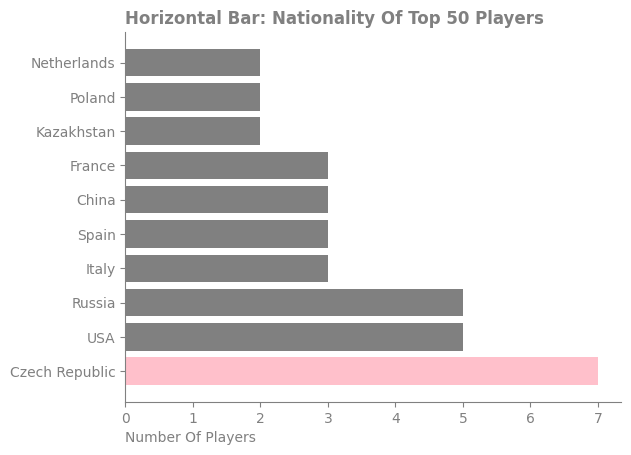

In [89]:
ax = plt.subplot()
clrs = ["grey" if (x < max(top_50_players_country["number_of_top_50_players"]))
         else "pink" for x in top_50_players_country["number_of_top_50_players"]]

ax.barh(top_50_players_country["country"], top_50_players_country["number_of_top_50_players"] , color=clrs)
ax.set_title("Horizontal Bar: Nationality Of Top 50 Players", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Number Of Players", loc="left", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.show()

#### Q7: What is the average number of aces per match?

In [37]:
statistics_aces_df = statistics_df[(statistics_df["period"] == "ALL") & (statistics_df["statistic_name"] == "aces")]
statistics_aces_df["total_aces"] = statistics_aces_df["home_value"] + statistics_aces_df["away_value"]
mean_aces_per_match = statistics_aces_df["total_aces"].mean().round(2)
print(f"The average of aces per match is: {mean_aces_per_match}\n")

The average of aces per match is: 4.01



C:\Users\amine\AppData\Local\Temp\ipykernel_3180\1391347419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_aces_df["total_aces"] = statistics_aces_df["home_value"] + statistics_aces_df["away_value"]


##### Q7 Analysis
An ace is when a player hits a serve, and the returner can't get it back into court and doesn't even get a racket on the ball. At first from statistics_df aces was extracted and sum of home and away aces was calculated in a new column(total_aces), then based on that, average was found.

#### Q8: Is there a difference in the number of double faults based on gender?

In [38]:
statistics_double_faults_df = statistics_df[(statistics_df["period"] == "ALL") & 
                                            (statistics_df["statistic_name"] == "double_faults")]

statistics_double_faults_df["total_double_faults"] =  (statistics_double_faults_df["home_value"] + 
                                                       statistics_double_faults_df["away_value"])

total_double_faults_df = statistics_double_faults_df[["match_id", "total_double_faults"]]


total_players = pd.merge(away_team_df[["match_id","gender"]], home_team_df[["match_id","gender"]], how="outer")
total_players.duplicated().sum()

double_faults_average_per_match_based_gender = pd.merge(total_double_faults_df, total_players).groupby(
    "gender").agg(double_faults_average_per_match=("total_double_faults","mean")).reset_index().round(2) 
double_faults_average_per_match_based_gender 

C:\Users\amine\AppData\Local\Temp\ipykernel_3180\1596813039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_double_faults_df["total_double_faults"] =  (statistics_double_faults_df["home_value"] +


,gender,double_faults_average_per_match
0,F,7.56
1,M,5.34


##### Q8 Analysis
In tennis, if the serving player makes two mistakes in the same point, it is called a double fault, and they lose the point and the point is awarded to their opponent. At first  sum of home and away double faults was calculated in a new column named total_double_faults and merged with home and away team to have gender.

 **After grouping by gender and finding the average, it was obvious that total faults in women matches was more than men**. it's shown in relevant bar plot.

C:\Users\amine\AppData\Local\Temp\ipykernel_3180\3721116665.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


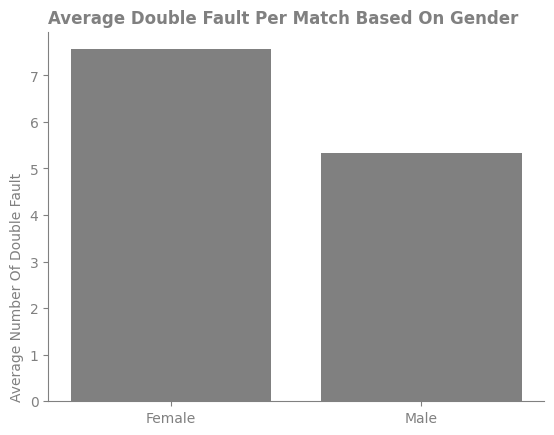

In [88]:
ax = plt.subplot()

ax.bar(double_faults_average_per_match_based_gender["gender"],
        double_faults_average_per_match_based_gender["double_faults_average_per_match"] , color="gray")
ax.set_title("Average Double Fault Per Match Based On Gender ", loc="left", color="gray", fontweight="bold")
ax.set_ylabel("Average Number Of Double Fault", loc="bottom", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

labels = ["Female", "Male"]
ax.set_xticklabels(labels)

plt.show()

#### Q9: Which player has won the most tournaments in a single month?

In [41]:
final_matches_id = round_df[round_df["slug"] == "final"][["match_id","slug"]] 
final_winners_and_dates = pd.merge(final_matches_id,event_df)[["match_id","winner_code","start_datetime"]]
final_winners_and_dates["start_datetime"] = pd.to_datetime(
    final_winners_and_dates["start_datetime"], unit='s').dt.to_period('M')

home_winner = final_winners_and_dates[final_winners_and_dates["winner_code"] == 1]
away_winner = final_winners_and_dates[final_winners_and_dates["winner_code"] == 2]
home_winner_player_names = pd.merge(home_winner["match_id"], home_team_df)[["match_id","full_name"]]
away_winner_player_names = pd.merge(away_winner["match_id"], away_team_df)[["match_id","full_name"]]

total_winners_name = pd.merge(pd.merge(home_winner, home_winner_player_names),
                               pd.merge(away_winner, away_winner_player_names), how="outer")
winner_names_of_tournaments_in_month = total_winners_name.groupby(["start_datetime", "full_name"]).agg(
    number_of_tournaments_of_win=("full_name","count")).sort_values(
        "number_of_tournaments_of_win", ascending=False).head()

winner_names_of_tournaments_in_month

number_of_tournaments_of_win
start_datetime full_name                                            
2023-10        Bartunkova, Nikola                                  1
               Biolay, Sophia                                      1
               Tirante, Thiago Agustin                             1
               Tabur, Clement                                      1
               Shelbayh, Abedallah                                 1

##### Q9 Analysis
The first step is to find which match is final. The second is finding month of final, then to find name of players, it should be merged with home and away tables. The last but not the least is to group by name and date of matches.

**Because there are just one month and all of players won just one tournament, it's not meaningful to draw a plot.** 

If there were more than one month it was possible to select max of each group (means each month) adn it was possible with find max id(idxmax()) and then df.loc[idxmax()]

#### Q10: Is there a correlation between a player's height and their ranking?

In [44]:
total_players = pd.merge(home_team_df[["slug", "gender", "height", "current_rank"]],
                          away_team_df[["slug", "gender", "height", "current_rank"]], how="outer")

total_players.duplicated().sum()
total_players = total_players.drop_duplicates().reset_index(drop=True)

total_female_players = total_players[total_players["gender"] == "F"]
total_male_players = total_players[total_players["gender"] == "M"]

total_male_players[total_male_players.isna().any(axis=1)]
total_female_players[total_female_players.isna().any(axis=1)]
total_male_players[total_male_players["current_rank"].isna()]
total_male_players = total_male_players.dropna(subset=["current_rank"])
total_female_players[total_female_players["current_rank"].isna()]
total_female_players = total_female_players.dropna(subset=["current_rank"])

total_female_players["height"] = total_female_players["height"].fillna(total_female_players["height"].mean().round(2))
total_male_players["height"] = total_male_players["height"].fillna(total_male_players["height"].mean().round(2))

print("Male correlation between height ang rank: ",
      total_male_players["height"].corr(total_male_players["current_rank"]))
print("Female correlation between height ang rank: ",
      total_female_players["height"].corr(total_female_players["current_rank"]))

Male correlation between height ang rank:  -0.11480808221589986
Female correlation between height ang rank:  -0.05487203884108093


##### Q10 Analysis
First of all, total player's height and their rank was extracted. After cleaning date(remove duplicated data and handling nan values), based on their gender, average height was calculated and at last the correlation between height and rank was achieved. It's obvious that the correlation should be consider based gender, because the average height of female is lower than male. 

**This analysis shows that in this data set there isn't any meaningful correlation(as it's shown in heat map diagram) between height and player's rank.**

ValueError: [] is not a valid value for axis; supported values are 'x', 'y', 'both'

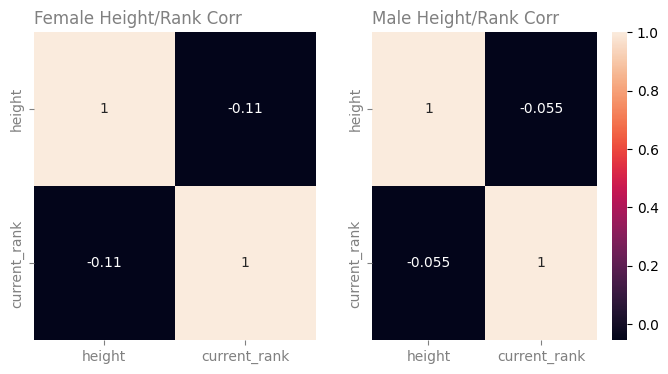

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title("Female Height/Rank Corr", loc="left", color="gray")
ax1 = sns.heatmap(total_male_players[["height","current_rank"]].corr(), annot=True, ax=ax1, cbar=False)
ax1.tick_params(axis='x', colors='gray')
ax1.tick_params(axis='y', colors='gray')

ax2.set_title("Male Height/Rank Corr", loc="left", color="gray")
ax2 = sns.heatmap(total_female_players[["height","current_rank"]].corr(), annot=True, ax=ax2, cmap=None)
ax2.tick_params(axis='x', colors='gray')
ax2.tick_params(axis='y', colors='gray')

cax = ax2.figure.axes[-1]
cax.tick_params([])

plt.show()

#### Q11: What is the average duration of matches?

In [46]:
time_df["sum_of_durations"] = (time_df["period_1"].fillna(0) + time_df["period_2"].fillna(0) + time_df["period_3"].fillna(0) +
                            time_df["period_4"].fillna(0) + time_df["period_5"].fillna(0))
print(f"The average duration of matches is {np.divide(time_df["sum_of_durations"].mean(),60).round(2)} minutes.")

The average duration of matches is 42.05 minutes.


##### Q11 Analysis
For achieving that goal, sum of periods in time_df was calculated in a new column(sum_of_durations). Based on this column the average based min minutes was achieved. **It should be considered this time is the net time and duration of a whole match may be much more than this net time.**

#### Q12: What is the average number of games per set in men's matches compared to women's matches?

In [48]:
match_game_num = tennis_power_df[["match_id","set_num"]].groupby(["match_id","set_num"]).agg(games=("set_num","count"))
total_players = pd.merge(home_team_df[["match_id", "gender"]], away_team_df[["match_id", "gender"]], how="outer")
total_players = pd.merge(match_game_num, total_players, on="match_id")

sum_of_male_games = total_players[total_players["gender"] == "M"]["games"].sum()
sum_of_male_sets = total_players[total_players["gender"] == "M"]["games"].count()
male_games_per_set = np.divide(sum_of_male_games, sum_of_male_sets).round(2)
print(f"Average games per sets for male is: {male_games_per_set}")

sum_of_female_games = total_players[total_players["gender"] == "F"]["games"].sum()
sum_of_female_sets = total_players[total_players["gender"] == "F"]["games"].count()
female_games_per_set = np.divide(sum_of_female_games, sum_of_female_sets).round(2)
print(f"Average games per sets for female is: {female_games_per_set}")


Average games per sets for male is: 9.12
Average games per sets for female is: 8.79


##### Q12 Analysis
First number of games per set was found and also gender of players in each match. Then based of gender the average of games per set was calculated. **It's obvious that there isn't a major difference between them(as it was shown in diagram).**

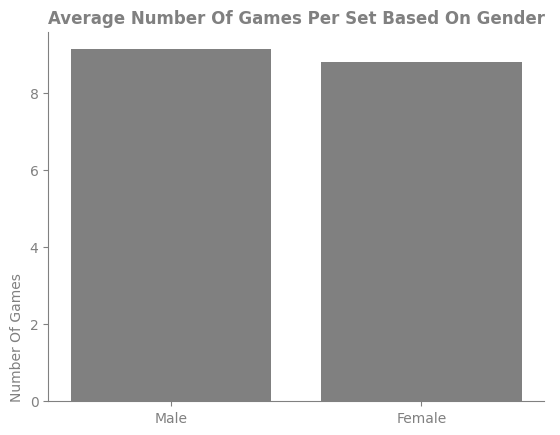

In [85]:
ax = plt.subplot()
y = [male_games_per_set, female_games_per_set]
x = ["Male", "Female"]
ax.bar(x, y, color="gray")
ax.set_title("Average Number Of Games Per Set Based On Gender ", loc="left", color="gray", fontweight="bold")
ax.set_ylabel("Number Of Games", loc="bottom", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.show()

#### Q13: What is the distribution of left-handed versus right-handed players?

In [50]:
left_right_hand_df = pd.merge(home_team_df[["slug","gender","plays"]],
                              away_team_df[["slug","gender","plays"]], how="outer")

left_right_hand_df.duplicated().sum()
left_right_hand_df.isna().sum()
left_right_hand_df = left_right_hand_df.dropna().reset_index(drop=True)

left_right_hand_df = left_right_hand_df.groupby("plays").agg(number_of_players=("plays","count")).reset_index()
left_right_hand_df["percent_of_total"] = np.multiply(np.divide(left_right_hand_df["number_of_players"] ,
                                                     left_right_hand_df["number_of_players"].sum()).round(3), 100)
left_right_hand_df


,plays,number_of_players,percent_of_total
0,left-handed,44,13.1
1,right-handed,292,86.9


##### Q13 Analysis
After extracting all players right/left handed and cleaning them, data was grouped by "plays" column and aggregated by count. At last to achieve the percentage, a new column was added. **As it's could be seen in the society that most people are right handed, among tennis players, right handed players are the majority of tennis society, as it was show in the donate pie chart.**

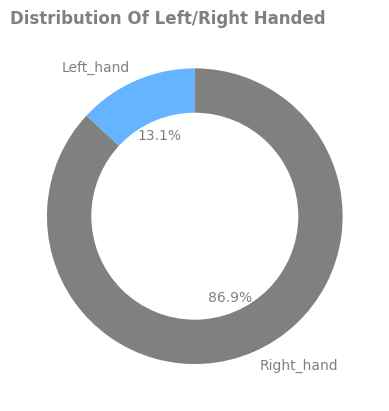

In [84]:
ax = plt.subplot()
colors = ['#66b3ff','gray']
ax.pie(left_right_hand_df["percent_of_total"], colors=colors,
        startangle=90, labels=['Left_hand', 'Right_hand'], autopct='%1.1f%%',textprops=dict(color="gray"))
ax.set_title("Distribution Of Left/Right Handed", loc="left", color="gray", fontweight="bold")
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

#### Q14: What is the most common type of surface used in tournaments?

In [52]:
tournament_df["ground_type"].isna().sum()
tournament_df.dropna(subset=["ground_type"], inplace=True)

ground_type_tournament = tournament_df.groupby("ground_type").agg(
    most_common_ground=("ground_type","count")).sort_values("most_common_ground",ascending=False).reset_index()
ground_type_tournament

,ground_type,most_common_ground
0,Hardcourt outdoor,336
1,Red clay,323
2,Hardcourt indoor,84
3,Carpet indoor,3
4,Synthetic outdoor,1


##### Q14 Analysis
After cleaning the ground type column, it was grouped and counted based on ground types. This analysis shows that the most common surface in this dataset is "hard court outdoor", but the month of tournaments should be considered. **For example if there were all months and all tournaments, the result may be different.**

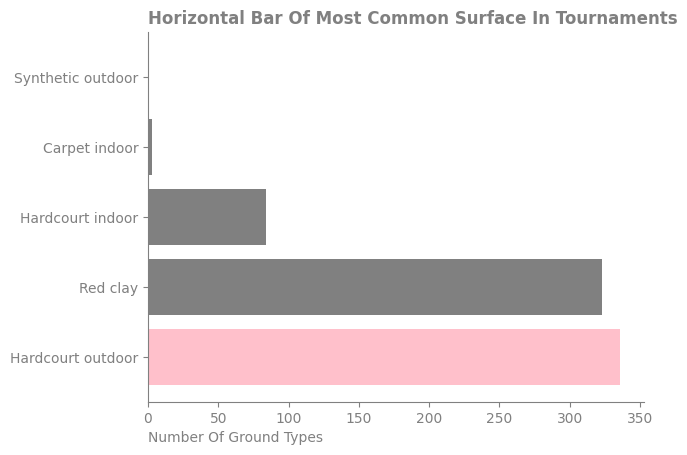

In [83]:
ax = plt.subplot()
clrs = ["grey" if (x < max(ground_type_tournament["most_common_ground"]))
         else "pink" for x in ground_type_tournament["most_common_ground"]]

ax.barh(ground_type_tournament["ground_type"], ground_type_tournament["most_common_ground"] , color=clrs)
ax.set_title("Horizontal Bar Of Most Common Surface In Tournaments", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Number Of Ground Types", loc="left", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.show()

#### Q15: How many distinct countries are represented in the dataset?

In [57]:
tournament_country_df = tournament_df.loc[tournament_df["tournament_slug"].str.len() < 20]
tournament_country_df = tournament_country_df["tournament_slug"].str.split('-').str[-1].unique()

home_birth_place_country = home_team_df.loc[home_team_df["birthplace"].str.len() > 10]
home_birth_place_country = home_birth_place_country["birthplace"].str.split(',').str[-1].unique()

home_country = home_team_df["country"].dropna().unique()

away_birth_place_country = away_team_df.loc[away_team_df["birthplace"].str.len() > 10]
away_birth_place_country = away_birth_place_country["birthplace"].str.split(',').str[-1].unique()

away_country = away_team_df["country"].dropna().unique()
venue_country = venue_df["country"].dropna().unique()

all_countries_dataset = np.concatenate((tournament_country_df, home_birth_place_country, home_country,
          away_birth_place_country, away_country, venue_country))
all_countries_dataset =list(map(str.strip, all_countries_dataset))
all_countries_dataset = list(map(str.lower,all_countries_dataset))
number_of_all_countries_dataset = len(set(all_countries_dataset))
print(f"There are {number_of_all_countries_dataset} unique countries in data set.")


There are 110 unique countries in data set.


##### Q15 Analysis
Country names are in 4 tables, home team df(birthplace and country), away team df(birthplace and country), tournament df(country) and venue df(country). After extracting all country names, unique them and cleaning, they were merged and number of distinct countries were calculated. 

#### Q16: Which player has the highest winning percentage against top 10 ranked opponents?

In [55]:
players_rank = pd.merge(home_team_df[["player_id","slug","current_rank"]],
                         away_team_df[["player_id","slug","current_rank"]], how="outer").sort_values("current_rank")

players_rank.duplicated().sum()
players_rank = players_rank.drop_duplicates()
players_rank.isna().sum()
players_rank = players_rank.dropna().reset_index(drop=True)

top_10_players = players_rank.head(10)

top_10_home = pd.merge(home_team_df[["match_id","slug","player_id" ]], top_10_players)
top_10_away = pd.merge(away_team_df[["match_id","slug","player_id" ]], top_10_players)

top_10_home_matches = pd.merge(top_10_home, event_df[["match_id", "winner_code"]])
top_10_home_losses = top_10_home_matches.loc[top_10_home_matches["winner_code"] == 2]
top_10_away_matches = pd.merge(top_10_away, event_df[["match_id", "winner_code"]])
top_10_away_losses = top_10_away_matches.loc[top_10_away_matches["winner_code"] == 1]

top_10_winner_home_opponent = pd.merge(top_10_home_losses, away_team_df[["match_id","full_name"]], on="match_id")
top_10_winner_away_opponent = pd.merge(top_10_away_losses, home_team_df[["match_id","full_name"]], on="match_id")

number_of_wins_against_top10 = pd.merge(top_10_winner_home_opponent, top_10_winner_away_opponent,
                                         how="outer").groupby("full_name").agg(number_of_wins_against_top10=(
                                             "full_name","count")).sort_values("number_of_wins_against_top10",
                                                                                ascending=False)
number_of_wins_against_top10

,number_of_wins_against_top10
full_name,
"Kudermetova, Veronika",1


##### Q16 Analysis
After finding all players ranking, cleaning them and selecting top 10 players, the first step is to find home/away top 10. The second is find top 10 losses and then next is the opponent names in those loss matches. The last step, but not the least is grouping and counting winner names of opponents. **In this data set just one player and one time can defeat top 10 ranked.**  

#### Q17: What is the average number of breaks of serve per match?

In [59]:
break_occurred_match = tennis_power_df.loc[tennis_power_df["break_occurred"] == True,
                                            ["match_id","break_occurred"]].reset_index(drop=True) # find where breaks occurred
break_occurred_match = break_occurred_match.groupby("match_id").agg(number_of_breaks=("break_occurred","count"))
average_number_of_break = np.mean(break_occurred_match["number_of_breaks"]).round(2)
print(f"Average number of breaks per match is: {average_number_of_break}")

Average number of breaks per match is: 7.2


##### Q17 Analysis
First of all break occurred should be found in power_df, then based on match_id it was grouped and aggregated by count. 

## Extra Analysis

#### E1: What are top 10 countries with most number of wins?

In [60]:
home_winner = event_df[event_df["winner_code"] == 1]["match_id"]
away_winner = event_df[event_df["winner_code"] == 2]["match_id"]

home_winner_names = pd.merge(home_team_df[["match_id", "full_name", "country"]], home_winner)
away_winner_names = pd.merge(away_team_df[["match_id", "full_name", "country"]], away_winner)

total_winners = pd.merge(home_winner_names, away_winner_names, how="outer")

total_winners.duplicated().sum()
total_winners.isna().sum()

total_winners = total_winners.groupby("country").agg(number_of_winner_players=("country","count")).sort_values(
    "number_of_winner_players", ascending=False).reset_index().head(10)
total_winners

,country,number_of_winner_players
0,France,55
1,Italy,39
2,Australia,30
3,Argentina,29
4,USA,27
5,Spain,26
6,Brazil,24
7,Germany,23
8,United Kingdom,23
9,Russia,21


##### E1 Analysis
After extracting winners from event table and merge them to home/away table to find winners nationality, it was grouped by country and counted. **Obviously tennis is sport of wealth people and wealth countries are most successful in the tennis rank.** As it was shown in diagram France, Italy and Australia are the top 3 countries.

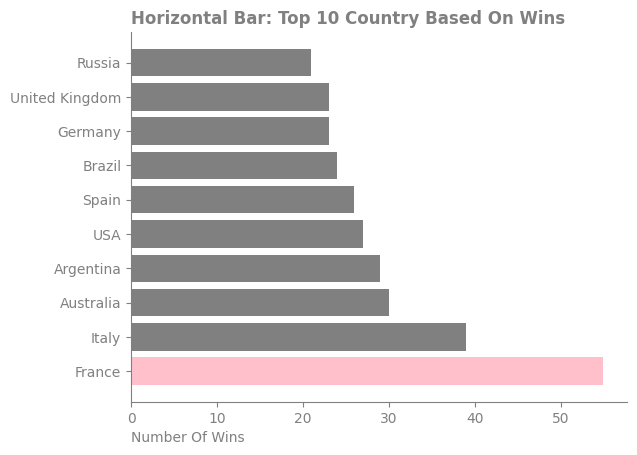

In [82]:
ax = plt.subplot()

clrs = ["grey" if (x < max(total_winners["number_of_winner_players"]))
        else "pink" for x in total_winners["number_of_winner_players"]]

ax.barh(total_winners["country"], total_winners["number_of_winner_players"] , color=clrs)
ax.set_title("Horizontal Bar: Top 10 Country Based On Wins", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Number Of Wins", loc="left", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

#### E2: In which month most matches ocurred?

In [63]:
matches_date = event_df[["match_id","start_datetime"]]
matches_date["start_datetime"] = pd.to_datetime(matches_date["start_datetime"], unit='s').dt.to_period('M')
matches_date_number = matches_date.groupby("start_datetime").agg(
    number_of_matches=("match_id","count")).sort_values("number_of_matches",ascending=False).reset_index()
matches_date_number

C:\Users\amine\AppData\Local\Temp\ipykernel_3180\3437942856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_date["start_datetime"] = pd.to_datetime(matches_date["start_datetime"], unit='s').dt.to_period('M')


,start_datetime,number_of_matches
0,2023-10,742
1,2023-09,22


##### E2 Analysis
When time of matches were extracted, it was grouped by time and number of countries were counted. **In this data set the result is not really meaningful but in a whole year it shows the season of matches means peak number of them.**

The obvious difference between month 9 and 10 is because of the time of data set collecting. 

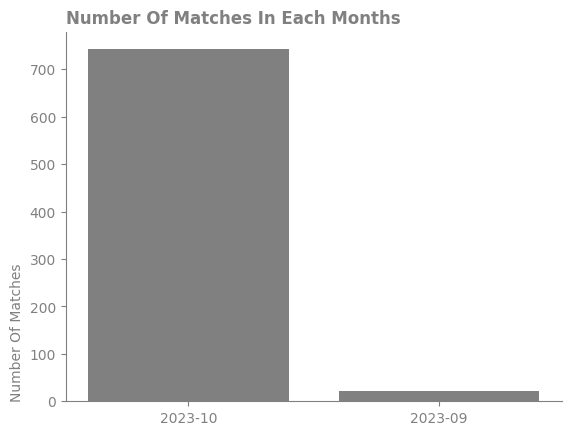

In [81]:
matches_date_number_str = matches_date_number
matches_date_number_str["start_datetime"] = matches_date_number_str["start_datetime"].astype(str)
ax = plt.subplot()

ax.bar(matches_date_number_str["start_datetime"],
        matches_date_number_str["number_of_matches"] , color="gray")
ax.set_title("Number Of Matches In Each Months", loc="left", color="gray", fontweight="bold")
ax.set_ylabel("Number Of Matches", loc="bottom", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.show()

#### E3: The most championships are for which countries? 

In [65]:
final_matches_ids = round_df[round_df["slug"] == "final"]["match_id"]
final_winners = pd.merge(final_matches_ids,event_df)[["match_id","winner_code"]]

home_winners = final_winners[final_winners["winner_code"] == 1]
away_winners = final_winners[final_winners["winner_code"] == 2]

home_winner_country = pd.merge(home_winners["match_id"], home_team_df)[["match_id","country"]]
away_winner_country = pd.merge(away_winners["match_id"], away_team_df)[["match_id","country"]]

most_championships = pd.merge(home_winner_country, away_winner_country, how="outer").groupby("country").agg(
    number_of_championships=("country","count")).sort_values(
        "number_of_championships", ascending=False).reset_index().head()
most_championships

,country,number_of_championships
0,France,4
1,Czech Republic,3
2,Spain,2
3,Argentina,1
4,Canada,1


##### E3 Analysis
First step is extracting final matches then final winner based home/away tables then find the nationality of winners. At last grouping by countries and counting them. **Exactly like pervious analysis again wealthy countries were appeared in top of the list.**

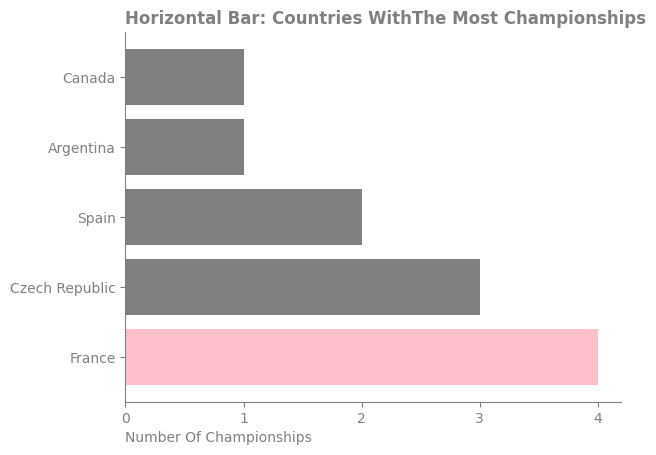

In [80]:
ax = plt.subplot()

clrs = ["grey" if (x < max(most_championships["number_of_championships"]))
        else "pink" for x in most_championships["number_of_championships"]]

ax.barh(most_championships["country"], most_championships["number_of_championships"] , color=clrs)
ax.set_title("Horizontal Bar: Countries WithThe Most Championships", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Number Of Championships", loc="left", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#### E4: What percentage of the predictions were correct?

In [68]:
event_vote_df = pd.merge(vote_df, event_df[["match_id","winner_code"]])

event_vote_df.isna().sum()
event_vote_df = event_vote_df.dropna().reset_index(drop=True)

event_vote_df["vote_prediction"] = np.where(event_vote_df["home_vote"] > event_vote_df["away_vote"], 1, 2)
total_number_of_matches = event_vote_df["match_id"].count()
total_number_of_correct_prediction = event_vote_df.loc[
    event_vote_df["winner_code"] == event_vote_df["vote_prediction"]]["match_id"].count()

percentage_of_correct_predictions = np.multiply(np.divide(
    total_number_of_correct_prediction, total_number_of_matches), 100).round(2)

print(f"The correct percentage of predictions is {percentage_of_correct_predictions} %")


The correct percentage of predictions is 67.37 %


##### E4 Analysis
For this analysis the fist step is merging vote and event to find winner code for each matches, then based on a condition vote prediction column was created, 1 for correct, 2 for incorrect predictions. Next step is find total number of matches and total number of correct predictions. At the end step the percentage of correct predictions was calculated. **It shows that more than half matches were predicted correctly.**

#### E5: Which country has the most presence in the finals?

In [69]:

final_match_ids = round_df[round_df["slug"] == "final"]["match_id"]

home_countries_in_final = pd.merge(final_match_ids, home_team_df)["country"]
away_countries_in_final = pd.merge(final_match_ids, away_team_df)["country"]

most_presence_in_final = pd.merge(home_countries_in_final, away_countries_in_final, how="outer").groupby("country").agg(
    number_of_presence_in_final=("country","count")).sort_values(
        "number_of_presence_in_final", ascending=False).reset_index().head()
most_presence_in_final                                                                                                                    

,country,number_of_presence_in_final
0,France,4
1,USA,3
2,United Kingdom,3
3,Argentina,2
4,Croatia,2


##### E5 Analysis
First final match ids were found and relevant countries after merging with home/away tables were extracted and based on countries and number of repetitions were grouped. **This analysis next to E3 analysis shows that France presence four times in final and in all of them championships was achieved to France but the second rank of presence in final is for USA that have just one championship.**

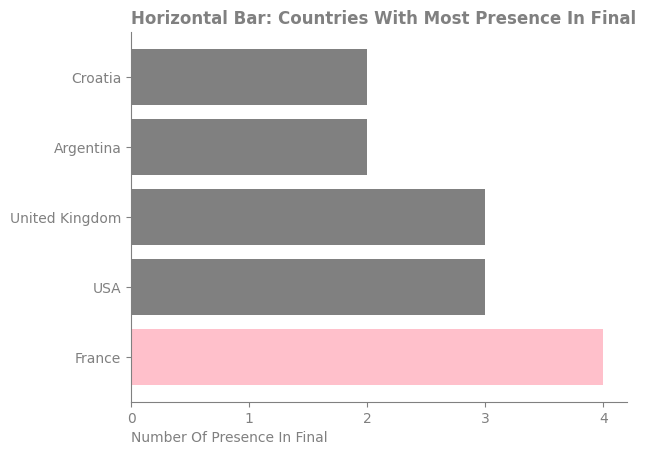

In [79]:
ax = plt.subplot()

clrs = ["grey" if (x < max(most_presence_in_final["number_of_presence_in_final"]))
        else "pink" for x in most_presence_in_final["number_of_presence_in_final"]]

ax.barh(most_presence_in_final["country"], most_presence_in_final["number_of_presence_in_final"] , color=clrs)
ax.set_title("Horizontal Bar: Countries With Most Presence In Final", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Number Of Presence In Final", loc="left", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#### Q6: Does the ranking of the players have an effect on the result?

In [71]:
home_rank = home_team_df[["match_id","current_rank"]]
away_rank = away_team_df[["match_id","current_rank"]]
merge_home_event = pd.merge(event_df[["match_id","winner_code"]], home_rank, how="outer").rename(
    {"current_rank":"home_rank"}, axis="columns")

total_winner_ranks = pd.merge(merge_home_event, away_rank, how="outer").rename(
    {"current_rank":"away_rank"}, axis="columns")

total_winner_ranks.duplicated().sum() 
total_winner_ranks.isna().sum()  
total_winner_ranks = total_winner_ranks.dropna().reset_index(drop=True)

total_winner_ranks["upper_rank"] = np.where(total_winner_ranks["home_rank"] > total_winner_ranks["away_rank"], 2, 1)
number_of_winner_based_their_rank = np.where(
    total_winner_ranks["winner_code"] == total_winner_ranks["upper_rank"])[0].shape[0]
total_winner = total_winner_ranks.shape[0]
winners_based_rank_percentage = np.multiply(np.divide(number_of_winner_based_their_rank, total_winner), 100).round(2)
print(f"In {winners_based_rank_percentage} % of matches, the result ocurred based on players rank.")

In 66.8 % of matches, the result ocurred based on players rank.


##### E6 Analysis
For having players rank, home/away team df should be merged by event to have rank and winner codes, after cleaning data a upper_rank column was added to total winner tables, those rows where winner code is equal to upper rank are the answer.

 **This shows that in more than 66 percent of matches players with upper ranks are the winners**, but it's not majority of matches and there are a good chance to players with lower rank to win a match.

#### E7: Which counties held most tournaments?

In [72]:
tournament_countries_df = tournament_df.loc[tournament_df["tournament_slug"].str.len() < 20]
tournament_countries_df = tournament_countries_df["tournament_slug"].str.split('-').str[-1]

tournament_countries_df = pd.DataFrame(tournament_countries_df).reset_index(drop=True)

most_held_tournament_countries_df = tournament_countries_df.groupby("tournament_slug").agg(
    number_of_tournament=("tournament_slug","count")).sort_values(
        "number_of_tournament", ascending=False).reset_index()
most_held_tournament_countries_df

,tournament_slug,number_of_tournament
0,china,36
1,kazakhstan,7
2,colombia,3
3,france,3
4,usa,3
5,portugal,2
6,spain,2
7,japan,1


##### E7 Analysis
The first step is to find tournament locations, turns it to data frame and at last step grouping by country names and counting them. **The very intreating point in this analysis is placing three developing countries in top of list. It shows their effort to be professional in next decades.**

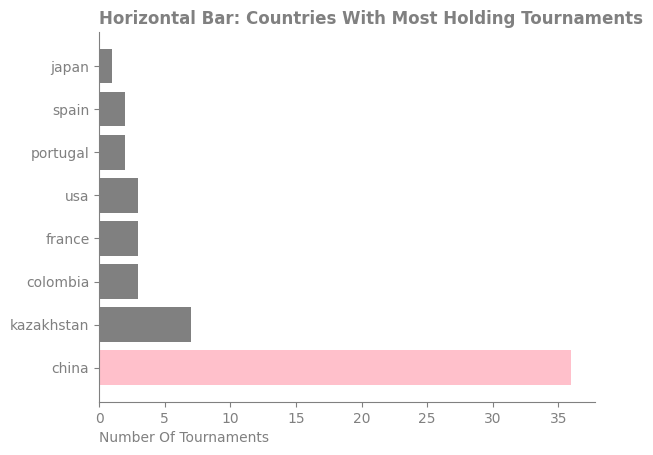

In [78]:
ax = plt.subplot()

clrs = ["grey" if (x < max(most_held_tournament_countries_df["number_of_tournament"]))
        else "pink" for x in most_held_tournament_countries_df["number_of_tournament"]]

ax.barh(most_held_tournament_countries_df["tournament_slug"],
         most_held_tournament_countries_df["number_of_tournament"] , color=clrs)
ax.set_title("Horizontal Bar: Countries With Most Holding Tournaments", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Number Of Tournaments", loc="left", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')